## https://youtu.be/1yBPEPhq54M

In [ ]:
import numpy as np
import sympy as smp
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

In [ ]:
x = smp.symbols('x')
x

x

In [ ]:
y = x**2 + 14*x + 1
y.factor()

x**2 + 14*x + 1

In [ ]:
y = x**2 + 2*x + 1
y.factor()

(x + 1)**2

In [ ]:
y.expand()

x**2 + 2*x + 1

In [ ]:
z = y + smp.sin(x)
z.factor()

x**2 + 2*x + sin(x) + 1

In [ ]:
z.expand()

x**2 + 2*x + sin(x) + 1

In [ ]:
(y - 4).factor()

(x - 1)*(x + 3)

In [ ]:
(y - 13).factor()

x**2 + 2*x - 12

In [ ]:
((x + 1)*(x - 13)).expand()

x**2 - 12*x - 13

In [ ]:
smp.solve(y, x)

[-1]

In [ ]:
smp.solve(z, x)

[]

In [ ]:
smp.solve(x**2 + 1, x)

[-I, I]

In [ ]:
x = smp.symbols('x', real=True)
smp.solve(x**2 + 1, x)

[]

In [ ]:
x = smp.symbols('x', real=True)
smp.solve(x**2 - 1, x)

[-1, 1]

In [ ]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x**2 - 1, x)

[1]

In [ ]:
x, y, z = smp.symbols('x y z')
y

y

In [ ]:
F = x * y - smp.atan(z)
F

x*y - atan(z)

In [ ]:
smp.solve(F, x)

[atan(z)/y]

In [ ]:
smp.solve(F, z)

[tan(x*y)]

In [ ]:
exp = smp.solve(F, x)[0]
exp_n = smp.lambdify([y,z], exp)
exp_n(1,1)

0.7853981633974483

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


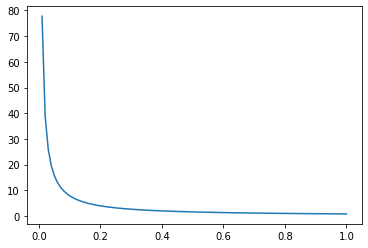

In [ ]:
ynum = np.linspace(0, 1, 100)
znum = 1
plt.plot(ynum, exp_n(ynum, znum))
plt.show()

In [ ]:
F

x*y - atan(z)

In [ ]:
F.subs([(y, 3), (z, smp.tan(y))])

3*x - atan(tan(y))

In [ ]:
F.subs([(y, smp.cos(x)), (z, 1)])

x*cos(x) - pi/4

In [ ]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)
vp

v_p

In [ ]:
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t
dhpdt

q*t + v_p

In [ ]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt
eq1, eq2

(-g*t**2/2 + h_0 - q*t**2/2 - t*v_0 - t*v_p, g*t + q*t - v_0 + v_p)

In [ ]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [ ]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [ ]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)])

g*(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q) - v_p/3 - sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [ ]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

-(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [ ]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

In [ ]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

In [ ]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x + g)
print(g)
f

g(x)


f(x + g(x))

In [ ]:
dfdx = smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [ ]:
dfdx.doit()

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [ ]:
dfdx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [ ]:
dfdx.subs([(g, smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [ ]:
dfdx.subs([(g, smp.sin(x)), (f, x**2)])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [ ]:
dfdx.subs([(g, smp.sin(x)), (f, x**2)]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [ ]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

In [ ]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

In [ ]:
t= smp.symbols('t')
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

In [ ]:
from sympy import assoc_laguerre

In [ ]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

In [ ]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

In [ ]:
R_10 = R.subs([(n,4),(l,3)])
R_10

sqrt(35)*r**3*exp(-r/(4*a))/(26880*a**(9/2))

In [ ]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))

In [ ]:
compute_int(n_val=3,l_val=1,k=3)

25*a/2

In [ ]:
smp.sqrt(compute_int(n_val=1,l_val=0,k=4) - compute_int(n_val=1,l_val=0,k=3)**2)

sqrt(3)*a/2

In [ ]:
compute_int(n_val=4,l_val=2,k=3)

21*a

In [ ]:
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

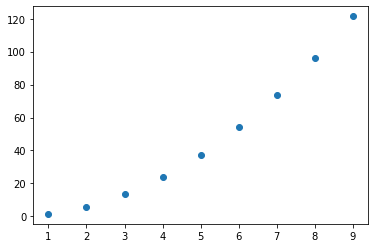

In [ ]:
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]
plt.scatter(ns, ds)

In [ ]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])
v

Matrix([
[v_1],
[v_2],
[v_3]])

In [ ]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

In [ ]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [ ]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [ ]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

In [ ]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

In [ ]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

In [ ]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

In [ ]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [ ]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

In [ ]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [ ]:
theta.subs(t,6).evalf()

0.251108015692338

In [ ]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [ ]:
smp.Integral(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In [ ]:
from scipy.integrate import quad_vec

In [ ]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [ ]:
smp.Integral(r,t).doit()

KeyboardInterrupt: ignored

In [ ]:
from scipy.integrate import quad_vec
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r_f = smp.lambdify([t], r)
quad_vec(r_f, 0, 1)[0]

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

In [ ]:
r = smp.Matrix([0, t, t**2])
r

Matrix([
[   0],
[   t],
[t**2]])

In [ ]:
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

asinh(2)/4 + sqrt(5)/2

In [ ]:
x, y, z, t, I, mu0 = smp.symbols('x y z t I \mu_0', real=True)
f, g, h = smp.symbols('f g h', cls=smp.Function)
f=f(t)
g=g(t)
h=h(t)

In [ ]:
r = smp.Matrix([x,y,z])
l = smp.Matrix([f,g,h])
dldt = smp.diff(l)
dldt

Matrix([
[Derivative(f(t), t)],
[Derivative(g(t), t)],
[Derivative(h(t), t)]])

In [ ]:
dBdt = I * dldt.cross(r-l) / (r-l).norm()**3
dBdt

Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

In [ ]:
R, H = smp.symbols('R, H', real=True)


dBdt = dBdt.subs([(f, R*smp.cos(t)),
                  (g, R*smp.sin(t)),
                  (h, 0),
                  (x,0), (y,0), (z,H)]).doit()
dBdt.simplify()
dBdt

Matrix([
[H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[      I*R**2/(H**2 + R**2)**(3/2)]])

In [ ]:
mu0/(4*smp.pi) * smp.integrate(dBdt, [t,0,2*smp.pi])

Matrix([
[                                    0],
[                                    0],
[I*R**2*\mu_0/(2*(H**2 + R**2)**(3/2))]])

In [ ]:
x, y, z = smp.symbols('x y z')

In [ ]:
f = y**2 * smp.sin(x+y)
smp.diff(f,x)

y**2*cos(x + y)

In [ ]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

In [ ]:
smp.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

In [ ]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)
w

w(x(t), y(t), z(t))

In [ ]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [ ]:
w1 = x**2+smp.exp(y)*smp.sin(z)

In [ ]:
smp.diff(w1,t)

2*x(t)*Derivative(x(t), t) + exp(y(t))*sin(z(t))*Derivative(y(t), t) + exp(y(t))*cos(z(t))*Derivative(z(t), t)

In [ ]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

In [ ]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

In [ ]:
t, R, g, m1, m2 = smp.symbols('t R g m_1 m_2')
z, theta = smp.symbols(r'z \theta', cls=smp.Function)
z = z(t)
theta = theta(t)

dzdt = smp.diff(z,t)
dthedt = smp.diff(theta,t)

In [ ]:
x = z + R*smp.sin(theta)
y = -R*smp.cos(theta)
y

-R*cos(\theta(t))

In [ ]:
T1 = smp.Rational(1,2) * m1 * smp.diff(z,t)**2
T2 = smp.Rational(1,2) * m2 * (smp.diff(x,t)**2 + smp.diff(y,t)**2)
T = T1 + T2
V1 = 0
V2 = m2*g*y
V = V1 + V2

In [ ]:
L = T-V
L

R*g*m_2*cos(\theta(t)) + m_1*Derivative(z(t), t)**2/2 + m_2*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))**2)/2

In [ ]:
LE1 = smp.diff(L, z) - smp.diff(smp.diff(L,dzdt), t)
LE2 = smp.diff(L, theta) - smp.diff(smp.diff(L,dthedt), t)
sols = smp.solve([LE1, LE2], [smp.diff(z,t,t), smp.diff(theta,t,t)])

In [ ]:
sols[smp.diff(theta,t,t)]

-R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2)

In [ ]:
sols[smp.diff(z,t,t)]

R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [ ]:
def dvdt(t, v):
    return 3*v**2 - 5
v0 = 0

In [ ]:
t = np.linspace(0, 1, 100)
sol_m1 = odeint(dvdt, y0=v0, t=t, tfirst=True)
sol_m2 = solve_ivp(dvdt, t_span=(0,max(t)), y0=[v0], t_eval=t)

In [ ]:
v_sol_m1 = sol_m1.T[0]
v_sol_m2 = sol_m2.y[0]

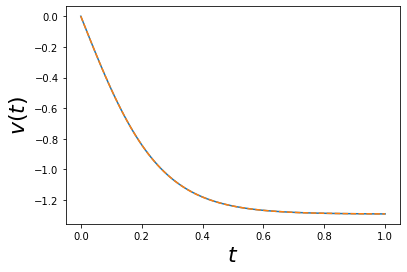

In [ ]:
plt.plot(t, v_sol_m1)
plt.plot(t, v_sol_m2, '--')
plt.ylabel('$v(t)$', fontsize=22)
plt.xlabel('$t$', fontsize=22)
plt.show()

In [ ]:
def dSdx(x, S):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [ ]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

In [ ]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

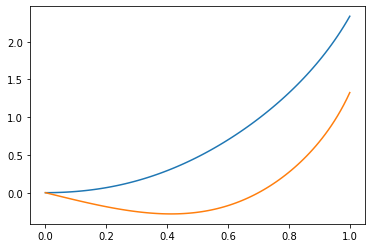

In [ ]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

In [ ]:
def dSdx(x, S):
    x, v = S
    return [v,
           -v**2 + np.sin(x)]
x_0 = 0
v_0 = 5
S_0 = (x_0, v_0)

In [ ]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=t, tfirst=True)

In [ ]:
x_sol = sol.T[0]
v_sol = sol.T[1]

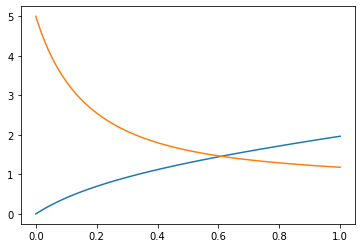

In [ ]:
plt.plot(t, x_sol)
plt.plot(t, v_sol)

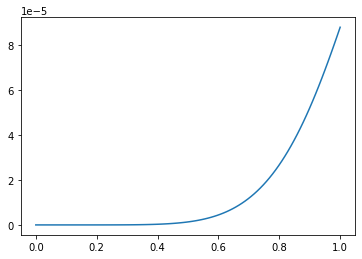

In [ ]:
def dSdt(t, S):
    x1, v1, a1, x2, v2, a2 = S
    return [v1,
            a1,
            -2*v2**2 + x2,
            v2,
            a2,
            -a1**3 + v2 + v1 + np.sin(t)]
x1_0 = 0
v1_0 = 0
a1_0 = 0
x2_0 = 0
v2_0 = 0
a2_0 = 0
v_0 = 0
S_0 = (x1_0, v1_0, a1_0, x1_0, v1_0, a1_0)


t = np.linspace(0, 1, 100)
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

plt.plot(t,sol.T[0])

In [ ]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

In [ ]:
a = np.array([1,2,3])
b = np.array([7,8,9])
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

In [ ]:
2*a+b

array([ 9, 12, 15])

In [ ]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

In [ ]:
np.dot(a, b)

50

In [ ]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [ ]:
np.cross(a,b)

array([-6, 12, -6])

In [ ]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [ ]:
np.linalg.norm(a)

3.7416573867739413

In [ ]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

In [ ]:
C = CoordSys3D('')

f = C.x * smp.sin(C.y)

gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [ ]:
gradient(f).to_matrix(C).subs([(C.y, 1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

In [ ]:
u = 4*C.i - 3*C.j + 2*C.k
# Make into unit vector
u = u.normalize()
u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [ ]:
gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

In [ ]:
# Wont Run!!
#x, y, z = smp.symbols('x, y, z')
#f = x*smp.exp(-y)*smp.cos(z)
#smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

In [ ]:
from scipy.integrate import tplquad
f = lambda z, y, x: x*np.exp(-y)*np.cos(z)
tplquad(f, 0, 1,
        lambda x: 0, lambda x: 1-x**2,
        lambda x, y: 3, lambda x, y: 4-x**2-y**2)[0]

-0.09109526451447894

In [ ]:
t = smp.symbols('t', real=True)
x, y, z, f = smp.symbols('x y z f', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = smp.Matrix([x, y, z])
f = f(x,y,z)



integrand = f*smp.diff(r,t).norm()
integrand1 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, t)]).doit().simplify()
smp.integrate(integrand1, (t, 0, 2*smp.pi))

sqrt(2)/2 + sqrt(2)*(-1/2 + 4*sqrt(2)*pi**(3/2)/3)

In [ ]:
integrand2 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, 3*smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, smp.exp(t/4))]).doit().simplify()


integrand2_num = smp.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]                

21.05530045675979